# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [3]:
tips = sns.load_dataset(('tips'))
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           1.52e-06
Time:                        12:10:26   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

0.3021437558623868

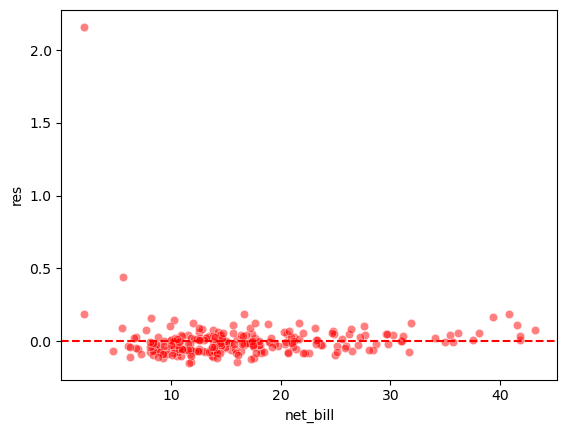

In [5]:
reg = smf.ols('tip_pct ~ net_bill', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .5, color='red')
plt.axhline(y=0, color='r', linestyle='--')

tips['pred'] = reg.fittedvalues
tips[['pred', 'tip_pct']].corr().iloc[0,1]

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           1.62e-13
Time:                        12:10:37   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054  

0.44914234088544236

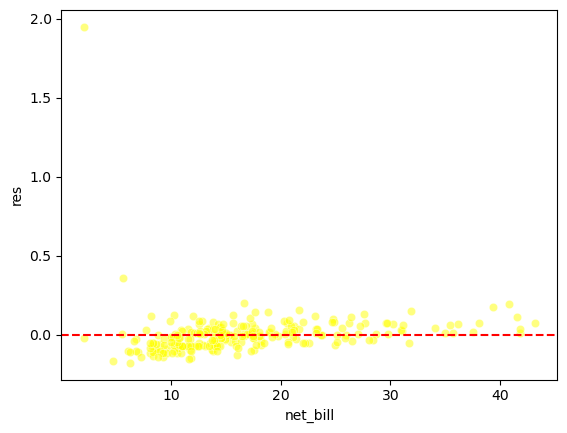

In [7]:
reg2 = smf.ols('tip_pct ~ np.log(net_bill)', data = tips).fit()
print(reg2.summary())
tips['res'] = reg2.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .5, color='yellow')
plt.axhline(y=0, color='r', linestyle='--')

tips['pred'] = reg2.fittedvalues
tips[['pred', 'tip_pct']].corr().iloc[0,1]

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           1.06e-09
Time:                        12:10:47   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.48

0.3969985482882293

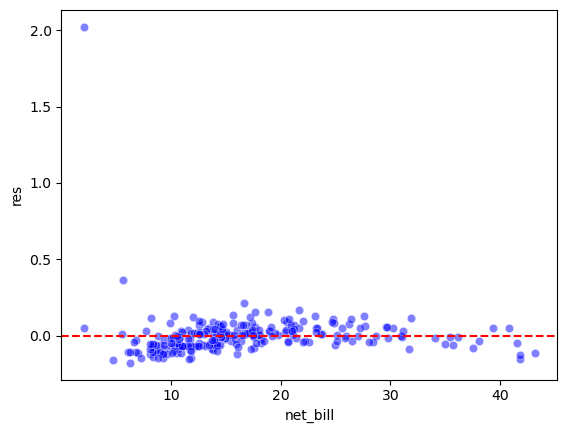

In [9]:
reg3 = smf.ols('tip_pct ~ net_bill + np.power(net_bill,2)', data = tips).fit()
print(reg3.summary())
tips['res'] = reg3.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')

tips['pred'] = reg3.fittedvalues
tips[['pred', 'tip_pct']].corr().iloc[0,1]

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           8.27e-16
Time:                        12:11:00   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

0.30214375586238695

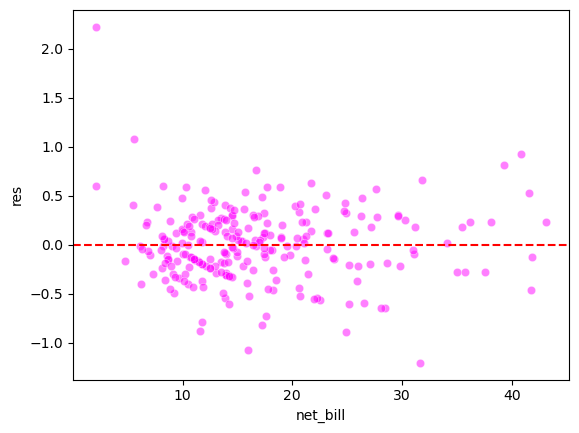

In [11]:
reg4 = smf.ols('np.log(tip_pct) ~ net_bill', data = tips).fit()
print(reg4.summary())
tips['res'] = reg4.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .5, color='magenta')
plt.axhline(y=0, color='r', linestyle='--')

tips['pred'] = reg4.fittedvalues
tips[['pred', 'tip_pct']].corr().iloc[0,1]

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           5.20e-20
Time:                        12:11:10   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

0.4491423408854422

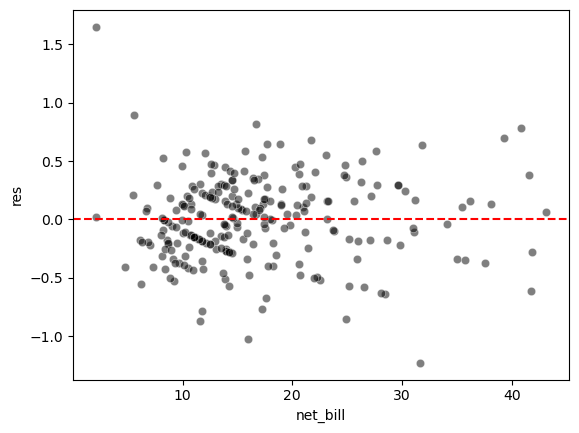

In [13]:
reg5 = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data = tips).fit()
print(reg5.summary())
tips['res'] = reg5.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .5, color='black')
plt.axhline(y=0, color='red', linestyle='--')

tips['pred'] = reg5.fittedvalues
tips[['pred', 'tip_pct']].corr().iloc[0,1]

###  6. qual modelo resultou no melhor ajuste?

In [15]:
tips['pred'] = reg.fittedvalues
tips[['pred', 'tip_pct']].corr().iloc[0,1]

0.3021437558623868

In [17]:
tips['pred'] = reg2.fittedvalues
tips[['pred', 'tip_pct']].corr().iloc[0,1]

0.44914234088544236

In [19]:
tips['pred'] = reg3.fittedvalues
tips[['pred', 'tip_pct']].corr().iloc[0,1]

0.3969985482882293

In [21]:
tips['pred'] = reg4.fittedvalues
tips[['pred', 'tip_pct']].corr().iloc[0,1]

0.30214375586238695

In [23]:
tips['pred'] = reg5.fittedvalues
tips[['pred', 'tip_pct']].corr().iloc[0,1]

0.4491423408854422

In [ ]:
Os melhores dados reprensentados são do reg2 e o reg5